#  Решение уравнения пьезопроводности

$$ \frac{\partial P}{\partial t} = \left( 
    \frac{\partial^2 P}{\partial x^2} + \frac{1}{r} \frac{\partial P}{\partial r}
\right) \varkappa $$

$$ \frac{P_{i}^{n+1} - P_{i}^{n}}{\tau} = \left( 
    \frac{P_{i-1}^{n+1} - 2 P_{i}^{n+1} + P_{i+1}^{n+1}}{h^2} + \frac{1}{r_i} \frac{P_{i+1}^{n+1} - P_{i-1}^{n+1}}{2h}
\right) \varkappa $$

В явном виде:

$$
P_{i}^{n+1} = \frac{\varkappa \tau (2r_i - h)}{2 r_i h^2} P_{i-1}^{n} - \left( \frac{2 \varkappa \tau}{h^2} - 1 \right) P_{i}^{n} + \frac{\varkappa \tau (2r_i + h)}{2r_i h^2} P_{i+1}^{n}
$$

В неявном виде:

$$
\frac{\varkappa \tau (2r_i - h)}{2 r_i h^2} P_{i-1}^{n+1} - \left( \frac{2 \varkappa \tau}{h^2} + 1 \right) P_{i}^{n+1} + \frac{\varkappa \tau (2r_i + h)}{2r_i h^2} P_{i+1}^{n+1} = - P_{i}^{n}
$$

$$
a_i P_{i-1}^{n+1} - c_i P_{i}^{n+1} + b_i P_{i+1}^{n+1} = - P_{i}^{n}
$$

## Загрузка библиотек, данные

In [1]:
import numpy as np
import SLAU
import matplotlib.pyplot as plt

In [2]:
# Физ. данные
T = 100

rc = 0.1
Rk = 50.

Pc = 2 * 10**6
Pk = 1 * 10**6

kappa = 0.8

# Параметры модели
N = 50
Nt = 1000

# Initialization
h = (Rk - rc) / (N - 1)
tau = T / (Nt - 1)
r = np.arange(rc, Rk + rc, h)
P = np.zeros([Nt, N])
P[0, :] = Pk    # Нач условие
P[:, 0], P[:, -1] = Pc, Pk      # Граничные условия

## Явный метод

In [3]:
P_explicit = np.ones_like(P, dtype=float) * P
for n in range(1, Nt):
    for i in range(1, N-1):
        P_explicit[n, i] = kappa * tau * (2 * r[i] - h) / (2 * r[i] * h**2) * P_explicit[n-1, i-1] - \
        (2 * kappa * tau / (h**2) - 1) * P_explicit[n-1, i] + \
            kappa * tau * (2 * r[i] + h) / (2 * r[i] * h**2) * P_explicit[n-1, i+1]

# P_explicit

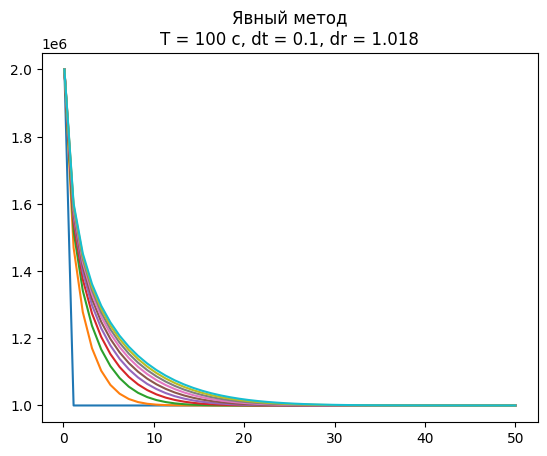

In [4]:
j = 0
for i in P_explicit:
    if j % 100 == 0:
        plt.plot(r, i)
    j += 1

plt.title(f"Явный метод\nT = {T} c, dt = {round(tau, 3)}, dr = {round(h, 3)}")
plt.show()

## Неявный метод

In [5]:
Np = N - 2
for n in range(1, Nt):
    a = np.zeros(Np-1)
    b = np.zeros(Np-1)
    c = np.zeros(Np)
    f = np.zeros(Np)
    j = 0
    for i in range(1, N-1):
        if i == 1:
            f[j] = P[n-1, i-1] + P[n-1, i] * kappa * tau * (2 * r[i] - h) / (2 * r[i] * h**2)
            b[j] = kappa * tau * (2 * r[i] + h) / (2 * r[i] * h**2)
        elif i == N-2:
            f[j] = P[n-1, i+1] + P[n-1, i] * kappa * tau * (2 * r[i] + h) / (2 * r[i] * h**2)
            a[j-1] = kappa * tau * (2 * r[i] - h) / (2 * r[i] * h**2)
        else:
            a[j-1] = kappa * tau * (2 * r[i] - h) / (2 * r[i] * h**2)
            b[j] = kappa * tau * (2 * r[i] + h) / (2 * r[i] * h**2)
            f[j] = P[n-1, i]
        c[j] = 2 * kappa * tau / h**2 + 1
        
        j += 1

    # print(f"{a}, {c}, {b}, {f}")
    P_solved = SLAU.tridiagonal_solve(a, b, c, f)
    # print(P_solved)
    P[n, 1:N-1] = P_solved


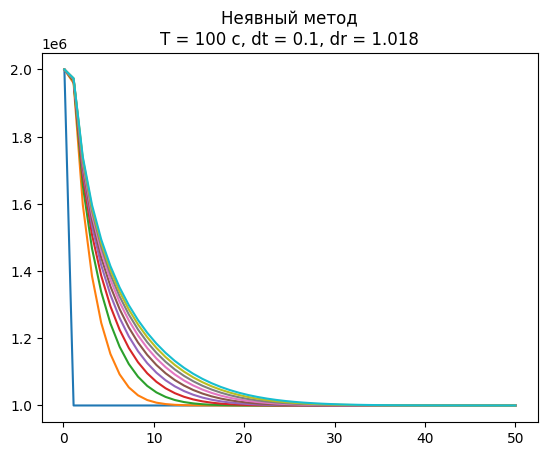

In [6]:
j = 0
for i in P:
    if j % 100 == 0:
        plt.plot(r, i)
    j += 1

plt.title(f"Неявный метод\nT = {T} c, dt = {round(tau, 3)}, dr = {round(h, 3)}")
plt.show()

## Сравнение методов

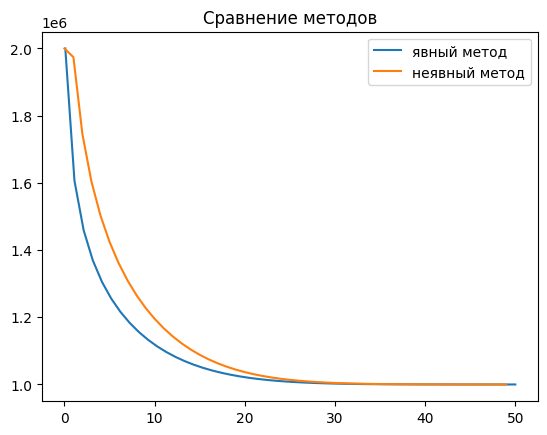

In [7]:
plt.plot(r, P_explicit[-1], P[-1])
plt.legend(["явный метод","неявный метод"])
plt.title("Сравнение методов")
plt.show()

## Добавить точное решение